In [1]:
import pandas as pd
import numpy as np
from math import log
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

%matplotlib inline

In [2]:
data1 = pd.read_csv('./data/dns1.csv')
data2 = pd.read_csv('./data/dns2.csv')
data3 = pd.read_csv('./data/dns3.csv')
data4 = pd.read_csv('./data/dns4.csv')
data5 = pd.read_csv('./data/dns5.csv')
data6 = pd.read_csv('./data/dns6.csv')
data7 = pd.read_csv('./data/dns7.csv')
data8 = pd.read_csv('./data/dns8.csv')
data9 = pd.read_csv('./data/dns9.csv')
data10 = pd.read_csv('./data/dns10.csv')
data11 = pd.read_csv('./data/dns11.csv')
data12 = pd.read_csv('./data/dns12.csv')
data13 = pd.read_csv('./data/dns13.csv')
data14 = pd.read_csv('./data/dns14.csv')
data15 = pd.read_csv('./data/dns15.csv')
data16 = pd.read_csv('./data/dns16.csv')
data17 = pd.read_csv('./data/dns17.csv')

In [3]:
head = ['UUID','S.No', 'Hostname', 'Req_cnt', 'Dist_Req_Cnt', 'high_req_cnt_single_domain', 'avg_req_per_min', 'high_req_per_min', 'cnt_query_a', 'cnt_query_mx', 'cnt_query_ns', 'cnt_query_ptr', 'dist_tld', 'dist_sld', 'dist_dns_server', 'res_cnt','dist_city_cnt', 'dist_subdivision_cnt', 'dist_country_cnt', 'res_rec_cnt', 'res_success_cnt', 'res_failed', 'avg_ttl_value', 'high_ttl_value', 'res_ip_cnt','Result','ResCode']
result1 = pd.read_csv('./data/DNS_FP_Anomaly1.csv', names=head)
result2 = pd.read_csv('./data/DNS_FP_Anomaly2.csv', names=head)
result3 = pd.read_csv('./data/DNS_FP_Anomaly3.csv', names=head)
result4 = pd.read_csv('./data/DNS_FP_Anomaly4.csv', names=head)
result5 = pd.read_csv('./data/DNS_FP_Anomaly5.csv', names=head)
result6 = pd.read_csv('./data/DNS_FP_Anomaly6.csv', names=head)
result7 = pd.read_csv('./data/DNS_FP_Anomaly7.csv', names=head)
result8 = pd.read_csv('./data/DNS_FP_Anomaly8.csv', names=head)
result9 = pd.read_csv('./data/DNS_FP_Anomaly9.csv', names=head)
result10 = pd.read_csv('./data/DNS_FP_Anomaly10.csv', names=head)
result11 = pd.read_csv('./data/DNS_FP_Anomaly11.csv', names=head)
result12 = pd.read_csv('./data/DNS_FP_Anomaly12.csv', names=head)
result13 = pd.read_csv('./data/DNS_FP_Anomaly13.csv', names=head)
result14 = pd.read_csv('./data/DNS_FP_Anomaly14.csv', names=head)
result15 = pd.read_csv('./data/DNS_FP_Anomaly15.csv', names=head)
result16 = pd.read_csv('./data/DNS_FP_Anomaly16.csv', names=head)
result17 = pd.read_csv('./data/DNS_FP_Anomaly17.csv', names=head)

In [4]:
result = pd.concat([result1, result2, result3, result4, result5, result6, result7, result8, result9, result10, 
                   result11, result12, result13, result14, result15, result16, result17])
col_n = ['Hostname','Result']
labeled_host = pd.DataFrame(result, columns = col_n)
labeled_host.drop(labeled_host.index[0], inplace=True)
labeled_host['Hostname'] = labeled_host['Hostname'].map(lambda x: x.split('_')[0])
labeled_host.drop_duplicates(['Hostname'], keep='last')
labeled_host.reset_index(drop=True, inplace=True)
labeled_host.shape

(15570, 2)

In [5]:
zero_col_count = dict(labeled_host['Result'].value_counts())
zero_col_count

{'Clean': 15195, 'Bot': 375}

In [6]:
Bot = labeled_host.loc[labeled_host['Result'] == 'Bot']
Bot_host = Bot['Hostname'].values.tolist()
len(Bot_host)

375

In [7]:
def Botlabel(data):
    Bot_data = data[(data['ip.src'].isin(Bot_host)) | (data['ip.dst'].isin(Bot_host))]
    return Bot_data

In [8]:
Bot_data1 = Botlabel(data1)
Bot_data2 = Botlabel(data2)
Bot_data3 = Botlabel(data3)
Bot_data4 = Botlabel(data4)
Bot_data5 = Botlabel(data5)
Bot_data6 = Botlabel(data6)
Bot_data7 = Botlabel(data7)
Bot_data8 = Botlabel(data8)
Bot_data9= Botlabel(data9)
Bot_data10 = Botlabel(data10)
Bot_data11 = Botlabel(data11)
Bot_data12 = Botlabel(data12)
Bot_data13 = Botlabel(data13)
Bot_data14 = Botlabel(data14)
Bot_data15 = Botlabel(data15)
Bot_data16 = Botlabel(data16)
Bot_data17 = Botlabel(data17)

Clean_data1 = data1.append(Bot_data1).drop_duplicates(keep=False)
Clean_data2 = data2.append(Bot_data2).drop_duplicates(keep=False)
Clean_data3 = data3.append(Bot_data3).drop_duplicates(keep=False)
Clean_data4 = data4.append(Bot_data4).drop_duplicates(keep=False)
Clean_data5 = data5.append(Bot_data5).drop_duplicates(keep=False)
Clean_data6 = data6.append(Bot_data6).drop_duplicates(keep=False)
Clean_data7 = data7.append(Bot_data7).drop_duplicates(keep=False)
Clean_data8 = data8.append(Bot_data8).drop_duplicates(keep=False)
Clean_data9 = data9.append(Bot_data9).drop_duplicates(keep=False)
Clean_data10 = data10.append(Bot_data10).drop_duplicates(keep=False)
Clean_data11 = data11.append(Bot_data11).drop_duplicates(keep=False)
Clean_data12 = data12.append(Bot_data12).drop_duplicates(keep=False)
Clean_data13 = data13.append(Bot_data13).drop_duplicates(keep=False)
Clean_data14 = data14.append(Bot_data14).drop_duplicates(keep=False)
Clean_data15 = data15.append(Bot_data15).drop_duplicates(keep=False)
Clean_data16 = data16.append(Bot_data16).drop_duplicates(keep=False)
Clean_data17 = data17.append(Bot_data17).drop_duplicates(keep=False)

In [9]:
def count_type(x):
    ret = 0
    for qry in x:
        if qry  != 1 and qry != 5:
            ret += 1 
    return 100 * ret / x.size

def calc_entropy(x):
    numEntries = x.size
    labelCounts = {} 
    for label in x: 
        if label not in labelCounts.keys(): labelCounts[label] = 0
        labelCounts[label] += 1 
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries 
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt
    
def data_process(df):
    def swap_column(df, l, r):
        tmp = df.pop(l)
        df[l] = df[r]
        df[r] = tmp
    
    def qry_process(df_qry):
        df_qry.insert(9, 'dns.qry.subname', df_qry['dns.qry.name'].apply(lambda x: '.'.join(x.split('.')[-2:]) if type(x) == str else ''))
        df_qry.insert(10, 'dns.qry.subname_len', df_qry['dns.qry.subname'].apply(lambda x: len(x))) 
        df_qry['udp.length'] = df_qry['udp.length']-8
        df_qry.rename(columns={'udp.length':'dns.length'},inplace=True) 
        
        gp = df_qry.groupby(['ip.src'])
        newdf = pd.DataFrame(gp.agg({'dns.length':'mean'})) #DNS总长度均值
        newdf = newdf.join(gp.agg({'dns.qry.name.len': 'sum'}))
        newdf = newdf.join(gp.agg({'dns.qry.name.len':['mean','max']}),lsuffix='qryLen') #请求域名均值与最大值
        newdf = newdf.join(gp.agg({'dns.count.labels':'mean'})) #域名标签数量，标签指点分割的两段
        
        newdf = newdf.join(gp.agg({'dns.qry.type':count_type}))
        newdf.rename(columns={'dns.qry.type':'typeNot_qryCount'},inplace=True)
        newdf = newdf.join(gp.agg({'dns.qry.subname_len':['max','mean']}),lsuffix='subname_len') 
        newdf = newdf.join(gp['dns.qry.name'].agg('nunique')) #不同主机名的个数
        newdf = newdf.join(gp['dns.qry.subname'].agg(calc_entropy))
        newdf.rename(columns={'dns.qry.subname':'dns.qry.subname_entropy'},inplace=True)

        return newdf
    
    def res_process(df_res):
        #对响应进行处理
        swap_column(df_res, 'ip.src', 'ip.dst')
        swap_column(df_res, 'udp.srcport', 'udp.dstport')
        gp = df_res.groupby(['ip.src'])

        newdf = pd.DataFrame(gp.agg({'dns.resp.len':'mean'})) #响应数据的长度均值
        newdf = newdf.join(gp.agg({'dns.resp.ttl':'mean'})) #响应TTL的均值
        newdf = newdf.join(gp.agg({'dns.count.queries':'mean'})) #请求中请求数量的均值
        newdf = newdf.join(gp.agg({'dns.count.answers':'mean'})) #请求中响应数量的均值

        return newdf
#     
    df_qry = qry_process(df.loc[df['udp.srcport']!=53]) #源端口不是53的归为请求
    df_res = res_process(df.loc[(df['udp.srcport']==53)&(df['dns.flags.response']==1)]) #源端口是53且是响应数据包的归为响应

    newdf = df_qry.join(df_res)
    newdf = newdf.fillna(0)

    return newdf

In [10]:
Bot_data1_processed = data_process(Bot_data1)
Bot_data2_processed = data_process(Bot_data2)
Bot_data3_processed = data_process(Bot_data3)
Bot_data4_processed = data_process(Bot_data4)
Bot_data5_processed = data_process(Bot_data5)
Bot_data6_processed = data_process(Bot_data6)
Bot_data7_processed = data_process(Bot_data7)
Bot_data8_processed = data_process(Bot_data8)
Bot_data9_processed = data_process(Bot_data9)
Bot_data10_processed = data_process(Bot_data10)
Bot_data11_processed = data_process(Bot_data11)
Bot_data12_processed = data_process(Bot_data12)
Bot_data13_processed = data_process(Bot_data13)
Bot_data14_processed = data_process(Bot_data14)
Bot_data15_processed = data_process(Bot_data15)
Bot_data16_processed = data_process(Bot_data16)
Bot_data17_processed = data_process(Bot_data17)


Clean_data1_processed = data_process(Clean_data1)
Clean_data2_processed = data_process(Clean_data2)
Clean_data3_processed = data_process(Clean_data3)
Clean_data4_processed = data_process(Clean_data4)
Clean_data5_processed = data_process(Clean_data5)
Clean_data6_processed = data_process(Clean_data6)
Clean_data7_processed = data_process(Clean_data7)
Clean_data8_processed = data_process(Clean_data8)
Clean_data9_processed = data_process(Clean_data9)
Clean_data10_processed = data_process(Clean_data10)
Clean_data11_processed = data_process(Clean_data11)
Clean_data12_processed = data_process(Clean_data12)
Clean_data13_processed = data_process(Clean_data13)
Clean_data14_processed = data_process(Clean_data14)
Clean_data15_processed = data_process(Clean_data15)
Clean_data16_processed = data_process(Clean_data16)
Clean_data17_processed = data_process(Clean_data17)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value

In [11]:
Bot_data1_processed['label'] = 1
Bot_data2_processed['label'] = 1
Bot_data3_processed['label'] = 1
Bot_data4_processed['label'] = 1
Bot_data5_processed['label'] = 1
Bot_data6_processed['label'] = 1
Bot_data7_processed['label'] = 1
Bot_data8_processed['label'] = 1
Bot_data9_processed['label'] = 1
Bot_data10_processed['label'] = 1
Bot_data11_processed['label'] = 1
Bot_data12_processed['label'] = 1
Bot_data13_processed['label'] = 1
Bot_data14_processed['label'] = 1
Bot_data15_processed['label'] = 1
Bot_data16_processed['label'] = 1
Bot_data17_processed['label'] = 1

Clean_data1_processed['label'] = 0
Clean_data2_processed['label'] = 0
Clean_data3_processed['label'] = 0
Clean_data4_processed['label'] = 0
Clean_data5_processed['label'] = 0
Clean_data6_processed['label'] = 0
Clean_data7_processed['label'] = 0
Clean_data8_processed['label'] = 0
Clean_data9_processed['label'] = 0
Clean_data10_processed['label'] = 0
Clean_data11_processed['label'] = 0
Clean_data12_processed['label'] = 0
Clean_data13_processed['label'] = 0
Clean_data14_processed['label'] = 0
Clean_data15_processed['label'] = 0
Clean_data16_processed['label'] = 0
Clean_data17_processed['label'] = 0

In [12]:
Bot_data = pd.concat([Bot_data1_processed, Bot_data2_processed, Bot_data3_processed, Bot_data4_processed, Bot_data5_processed, Bot_data6_processed, Bot_data7_processed, Bot_data8_processed, Bot_data9_processed, Bot_data10_processed, Bot_data11_processed, Bot_data12_processed, Bot_data13_processed, Bot_data14_processed, Bot_data15_processed, Bot_data16_processed, Bot_data17_processed])
Clean_data = pd.concat([Clean_data1_processed, Clean_data2_processed, Clean_data3_processed, Clean_data4_processed, Clean_data5_processed, Clean_data6_processed, Clean_data7_processed, Clean_data8_processed, Clean_data9_processed, Clean_data10_processed, Clean_data11_processed, Clean_data12_processed, Clean_data13_processed, Clean_data14_processed, Clean_data15_processed, Clean_data16_processed, Clean_data17_processed])

In [13]:
Bot_data.shape

(1824, 15)

In [14]:
Clean_data.shape

(36820, 15)

In [15]:
data = pd.concat([Bot_data, Clean_data])
data.shape

(38644, 15)

In [16]:
data = shuffle(data)

In [17]:
data

,dns.length,dns.qry.name.len,"(dns.qry.name.len, mean)","(dns.qry.name.len, max)",dns.count.labels,typeNot_qryCount,"(dns.qry.subname_len, max)","(dns.qry.subname_len, mean)",dns.qry.name,dns.qry.subname_entropy,dns.resp.len,dns.resp.ttl,dns.count.queries,dns.count.answers,label
ip.src,,,,,,,,,,,,,,,
172.31.247.145,37.583333,235.0,19.583333,29.0,3.000000,0.000000,20,12.666667,5,1.959148,17.500000,3835.083333,1.0,3.583333,0
172.31.151.153,42.965318,4319.0,24.965318,43.0,4.265896,0.000000,17,10.254335,33,3.279723,0.000000,0.000000,0.0,0.000000,1
172.31.153.139,38.125000,966.0,20.125000,48.0,3.312500,0.000000,13,9.854167,32,2.124843,0.000000,0.000000,0.0,0.000000,0
172.31.150.143,38.142857,1692.0,20.142857,44.0,3.309524,1.190476,14,12.321429,19,2.056408,0.000000,0.000000,0.0,0.000000,0
172.31.171.171,39.135354,20924.0,21.135354,51.0,3.468687,0.202020,15,10.400000,54,2.992097,10.013065,1232.096482,1.0,3.323618,0
172.31.4.30,38.181818,444.0,20.181818,29.0,3.227273,0.000000,13,11.090909,11,1.181899,20.045455,15847.363636,1.0,2.090909,0
172.31.107.75,44.113475,7364.0,26.113475,54.0,3.840426,0.000000,17,10.936170,27,1.996455,0.000000,0.000000,0.0,0.000000,0
172.31.170.162,48.363636,334.0,30.363636,55.0,3.909091,0.000000,15,13.000000,9,3.095795,31.000000,1199.454545,1.0,5.818182,0
172.31.131.139,45.333333,82.0,27.333333,33.0,4.333333,0.000000,13,12.666667,2,0.918296,0.000000,0.000000,0.0,0.000000,0


In [18]:
y = data.pop('label')

In [19]:
X = data
Y =  y

In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0) #采用随机过采样（上采样）
X, Y = ros.fit_sample(data, y)

Using TensorFlow backend.
C:\Users\MSI-NB\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MSI-NB\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MSI-NB\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MSI-NB\AppData

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, test_size=0.15, random_state=0, stratify = Y)

In [22]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Training accuracy：", acc_random_forest)

Training accuracy： 99.86


In [23]:
from sklearn.metrics import accuracy_score, recall_score
Y_pred = random_forest.predict(X_test)
print("Test accuary：", accuracy_score(Y_test, Y_pred))
print("Recall score:", recall_score(Y_test, Y_pred))

Test accuary： 0.9963787796487417
Recall score: 0.9965598406663045


In [24]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
strKFold = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)
scores = cross_val_score(random_forest, X, Y,cv=strKFold)
print("Mean score of straitified cross validation:{:.5f}".format(scores.mean()))

Mean score of straitified cross validation:0.99662


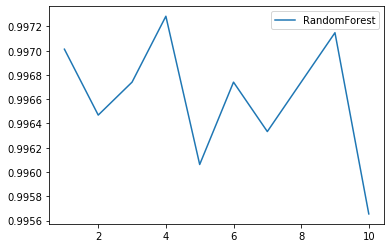

In [25]:
plt.plot(range(1,11),scores,label = "RandomForest")
plt.legend()
plt.show()

In [28]:
import pickle
pickle.dump(random_forest, open('forest.pkl', 'wb'), protocol=4)

In [76]:
# from sklearn.metrics import roc_curve, auc
# from scipy import interp

# probas_ = random_forest.predict_proba(X_test)
# # Compute ROC curve and area the curve
# fpr, tpr, thresholds = roc_curve(Y_test, probas_[:, 1])
# tprs.append(interp(mean_fpr, fpr, tpr))
# tprs[-1][0] = 0.0
# roc_auc = auc(fpr, tpr)
# aucs.append(roc_auc)
# plt.plot(fpr, tpr, lw=1, alpha=0.3,
#          label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

In [169]:
# test = Clean_data[30000:]

In [170]:
# test_y = test.pop('label')

In [171]:
# Y_pred = random_forest.predict(test)
# print("Test accuary：", accuracy_score(test_y, Y_pred))

Test accuary： 0.9963343108504399


In [36]:
Bot_data1_processed['label'][0]

1

In [37]:
type(Bot_data1_processed)

pandas.core.frame.DataFrame